# Natureza das Cargas - Distribuição de Energia Elétrica

Para um consjunto de de curvas de demanda diária em kW para 6 conjunto de cargas, serão calculados os seguintes parâmetros:

- Demanda máxima;
- Demanda média;
- Energia consumida em 1 dia;
- Fator de demanda;
- Fator de carga;
- Fator de utilização;
- Demanda diversificada;
- Demanda máxima diversificada;
- Demanda máxima não coincidente;
- Fator de diversidade do conjunto.

Considere os seguintes valores de carga instalada para cada um dos conjuntos de carga:
- Load 1: 70 kW
- Load 2: 40 kW
- Load 3: 75 kW
- Load 4: 40 kW
- Load 5: 60 kW
- Load 6: 55 kW

Considere também que cada uma das cargas estão ligadas a transformadores com as seguintes potências nominais:

- T1: 75kVA
- T2: 35kVA
- T3: 75kVA
- T4: 45kVA
- T5: 45kVA
- T6: 45kVA

Considere um fator de potência de 0,95 indutivo para todos os conjuntos. 

In [123]:
import sys, os
import pandas as pd
from pylab import *

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 15)
pd.set_option('display.max_rows', 8)
pd.set_option('precision', 3)

%cd /home/lucas/Dropbox/Disciplinas\ UFC/Distribuição/Aulas/Aula 2/Antigo/scripts

/home/lucas/Dropbox/Disciplinas UFC/Distribuição/Aulas/Aula 2/Antigo/scripts


## Carregando conjunto de dados

In [124]:
data = pd.read_excel('load_curve.xlsx', sheetname='load_curve')

In [125]:
data

,Load 1,Load 2,Load 3,Load 4,Load 5,Load 6
00:00:00,14.928,2.910,11.890,5.824,13.371,5.517
00:10:00,17.769,2.906,12.140,5.813,13.925,5.166
00:20:00,13.791,2.862,11.350,5.840,15.024,5.675
00:30:00,14.646,5.285,12.089,5.935,17.839,10.091
...,...,...,...,...,...,...
23:20:00,12.737,1.090,11.655,5.623,23.569,6.315
23:30:00,14.178,1.092,11.806,5.573,23.040,5.760
23:40:00,13.921,0.944,11.078,5.566,27.287,11.036
23:50:00,12.664,1.045,11.156,5.549,25.590,10.468


## Curvas de demanda

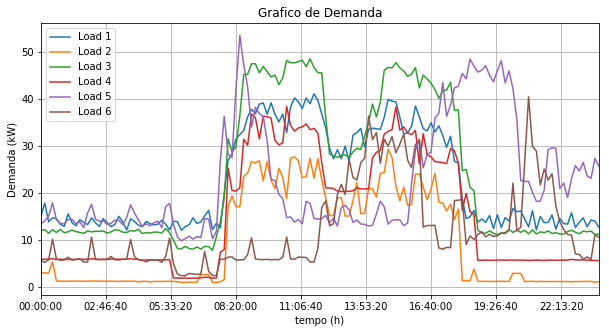

In [126]:
data['Load 1'].plot()
data['Load 2'].plot()
data['Load 3'].plot()
data['Load 4'].plot()
data['Load 5'].plot()
data['Load 6'].plot()
xlabel('tempo (h)')
ylabel('Demanda (kW)')
title('Grafico de Demanda')
legend()
grid(True)

## Cáculo da demanda máxima de cada uma das cargas

In [127]:
data.max()

Load 1    41.030
Load 2    29.226
Load 3    48.470
Load 4    38.350
Load 5    53.470
Load 6    40.400
dtype: float64

## Cálculo da demanda média de cada uma das Cargas

In [128]:
data.mean()

Load 1    22.466
Load 2     9.600
Load 3    23.885
Load 4    15.334
Load 5    22.678
Load 6    12.102
dtype: float64

## Cálculo da energia consumida para cada uma das cargas em kWh

In [129]:
data.sum() * (10 / 60)

Load 1    539.193
Load 2    230.389
Load 3    573.241
Load 4    368.019
Load 5    544.268
Load 6    290.452
dtype: float64

Outra forma de calcular

In [130]:
data.mean() * 24

Load 1    539.193
Load 2    230.389
Load 3    573.241
Load 4    368.019
Load 5    544.268
Load 6    290.452
dtype: float64

## Cálculo dos fatores de demanda

Fator de Demanda:

$$FD = \frac{D_{max}}{S_{inst}}$$

In [131]:
data.max() / array([70.0, 40.0, 75.0, 40.0, 60.0, 55.0])

Load 1    0.586
Load 2    0.731
Load 3    0.646
Load 4    0.959
Load 5    0.891
Load 6    0.735
dtype: float64

## Cálculo dos Fatores de Carga

Fator de Carga:

$$ FC = \frac{D_{med}}{D_{max}} $$

In [132]:
data.mean() / data.max()

Load 1    0.548
Load 2    0.328
Load 3    0.493
Load 4    0.400
Load 5    0.424
Load 6    0.300
dtype: float64

## Cálculo da demanda diversificada 

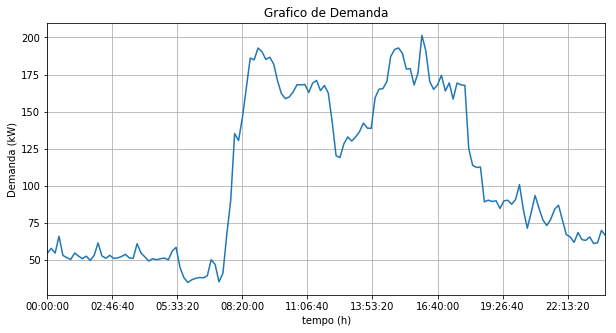

In [133]:
data.sum(axis=1).plot()
xlabel('tempo (h)')
ylabel('Demanda (kW)')
title('Grafico de Demanda')
grid(True)

## Cálculo da demanda diversificada máxima

In [134]:
data.sum(axis=1).max()

201.41200000000001

## Cálculo da demanda máxima não coincidente

In [135]:
data.max().sum()

250.946

## Cálculo do Fator de diversidade para as 6 cargas

Fator de Diversidade para $N$ cargas:

$$
FDiv = \frac{D_{max-div}}{D_{max-nao-coinc}} = \frac{max(\sum_{i=1}^{N}D_i(t))}{\sum_{i=1}^{n} max(D_i(t))}
$$

Em que $D_i(t)$ é a curva de demanda de uma carga $i$ e N é o número de cargas consideradas.

In [136]:
data.max().sum() / data.sum(axis=1).max()

1.245933708021369

## Cálculo do fator de diversidade acumulado

Carregando um conjunto de dados com maior número de consumidores

In [157]:
data_ = pd.read_excel('load_curve.xlsx', sheetname='load_curve_2')

In [158]:
data_ = data_ * 0.1
data_

,Load 1,Load 2,Load 3,Load 4,Load 5,Load 6,Load 7,...,Load 58,Load 59,Load 60,Load 61,Load 62,Load 63,Load 64
00:00:00,1.493,0.291,1.189,0.582,1.337,0.552,1.465,...,0.291,1.189,0.582,1.337,0.552,1.465,0.124
00:10:00,1.777,0.291,1.214,0.581,1.393,0.517,1.345,...,0.291,1.214,0.581,1.393,0.517,1.345,0.128
00:20:00,1.379,0.286,1.135,0.584,1.502,0.568,1.374,...,0.286,1.135,0.584,1.502,0.568,1.374,0.122
00:30:00,1.465,0.529,1.209,0.594,1.784,1.009,1.506,...,0.529,1.209,0.594,1.784,1.009,1.506,0.373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23:20:00,1.274,0.109,1.165,0.562,2.357,0.632,1.383,...,0.109,1.165,0.562,2.357,0.632,1.383,1.609
23:30:00,1.418,0.109,1.181,0.557,2.304,0.576,1.198,...,0.109,1.181,0.557,2.304,0.576,1.198,1.754
23:40:00,1.392,0.094,1.108,0.557,2.729,1.104,1.274,...,0.094,1.108,0.557,2.729,1.104,1.274,1.428
23:50:00,1.266,0.105,1.116,0.555,2.559,1.047,1.314,...,0.105,1.116,0.555,2.559,1.047,1.314,1.651


Inserindo aleatoriedade na amostra

In [159]:
rand_ = pd.DataFrame(uniform(0, 0.8, size=(144, 64)))
rand_.columns = data_.columns
rand_.index = data_.index
data_ = rand_ + data_
data_

,Load 1,Load 2,Load 3,Load 4,Load 5,Load 6,Load 7,...,Load 58,Load 59,Load 60,Load 61,Load 62,Load 63,Load 64
00:00:00,2.079,0.638,1.405,0.776,1.638,0.596,1.601,...,0.311,1.838,0.626,1.813,0.780,2.064,0.245
00:10:00,2.255,0.974,1.727,0.994,1.949,1.227,1.468,...,0.711,1.313,1.235,2.172,0.852,1.643,0.216
00:20:00,1.739,0.774,1.275,0.838,1.901,0.915,1.493,...,0.732,1.527,1.052,1.662,0.937,2.006,0.385
00:30:00,1.583,0.976,1.765,1.314,1.790,1.334,2.057,...,0.961,1.546,0.594,1.785,1.117,1.804,0.969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23:20:00,1.569,0.551,1.500,0.597,2.964,1.094,1.533,...,0.336,1.815,0.775,2.431,0.844,1.410,2.305
23:30:00,2.138,0.708,1.833,0.932,2.603,0.746,1.275,...,0.298,1.276,1.220,2.779,1.089,1.479,2.479
23:40:00,1.959,0.370,1.182,0.597,3.377,1.125,1.608,...,0.628,1.258,0.861,3.509,1.845,2.032,1.808
23:50:00,1.335,0.639,1.456,1.232,3.164,1.611,1.994,...,0.622,1.521,0.953,2.750,1.414,1.491,2.374


In [160]:
l_aux_1 = list() # acumula a demanda máxima não coincidente
aux_1 = 0.0 # armazena a demanda máxima não coincidente instantanea
l_aux_2 = list() # acumula a demanda máxima diversificada
aux_2 = 0.0 # armazena a demanda máxima diversificada instantanea
l_aux_3 = list() # acumula os fatores de diversidade

for k, i in enumerate(data_):
    aux_1 += data_[i].max()
    l_aux_1.append(aux_1)
    aux_2 = data_.iloc[:, 0:k+1].sum(axis=1).max()
    l_aux_2.append(aux_2)
    l_aux_3.append(aux_1 / aux_2)

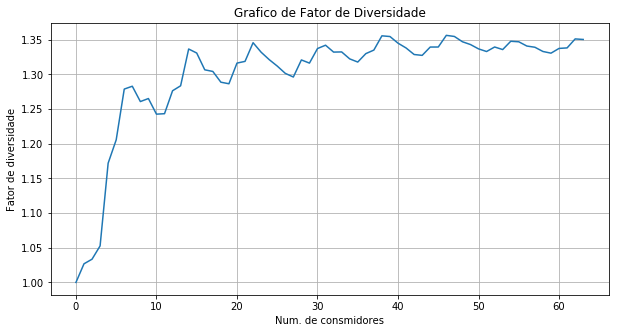

In [161]:
plot(l_aux_3)
xlabel('Num. de consmidores')
ylabel('Fator de diversidade')
title('Grafico de Fator de Diversidade')
grid(True)

## Demanda diversificada para o conjunto de 64 cargas

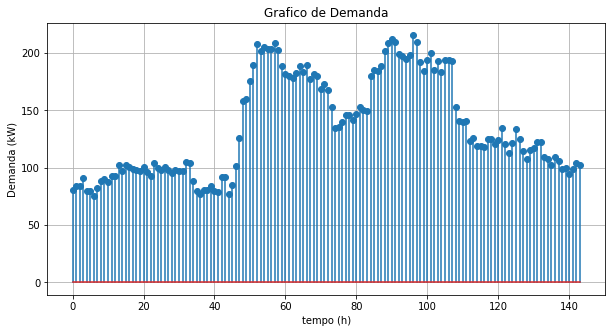

In [162]:
stem(data_.sum(axis=1))
xlabel('tempo (h)')
ylabel('Demanda (kW)')
title('Grafico de Demanda')
grid(True)

## Conjunto de todas as curvas de carga consideradas

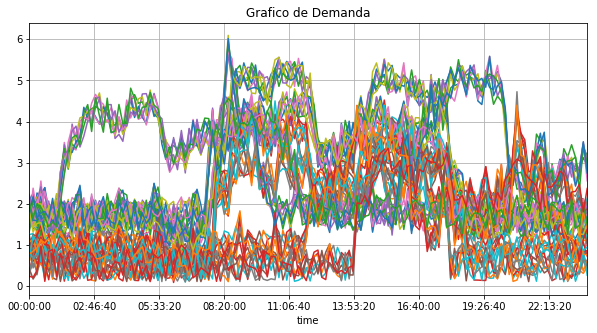

In [163]:
data_.plot(legend=[], grid=True, title='Grafico de Demanda')

## Exercícios

**Para o primeiro conjunto de dados (6 cargas)**:

1. Explique por que as duas formas de cálculo de energia consumida apresentaram o mesmo resultado. 

2. Calcule o fator de utilização para cada um dos transformadores que atendem as cargas.

3. Pesquise sobre curva de duração de carga e plote as curvas de duração de carga diária para cada um dos conjuntos de carga apresentados.

**Para o segundo conjunto de cargas (64 cargas)**:

1. Calcule as demandas máximas para as cargas 10-30.

2. Utilize o gráfico de fator de diversidade para calcular a demanda diversificada máxima do conjunto.

3. Com base nos itens anteriores dimensione um transformador para esse conjunto de cargas (10-30).

4. Calcule o fator de carga (FC) do conjunto e o fator de utilização (FU) do transformador encontrado no item 3.

Para a escolha do transformador utilize os valores padronizados pelas normas da Enel Distribuição Ceará.